___
# Atividade: Regressão Linear Simples
___

## Aula 21

**Preparo Prévio:**
1. Montogmery. Seção 6-2 - Simple Linear Regression
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples

**Hoje:**
1. Entender o conceito de regressão linear

**Próxima aula: (Terça-feira)**
1. Projeto 3

**Próxima aula: (Quinta-feira)**
1. Montogmery. Seção 6-3 - Multiple Regression

___

## Renda vs CO2

Foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita

As linhas representam os países e as colunas representam o ano. 

Como os arquivos estão separados, será preciso juntá-los cruzando o país.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')

In [4]:
#É possível verificar que cada linha representa um país e as colunas representam o ano
co2.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [5]:
#O mesmo se aplica a renda.
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


___
### Inner Join

Vamos agora juntar as duas tabelas via país, selecionar apenas o ano de 2010 e remover os NaNs.

Ao final vamos fazer o gráfico de dispersão das duas variáveis.

**Sugestão**: pesquise sobre a função DataFrame.join(), pode ser muito útil no futuro.

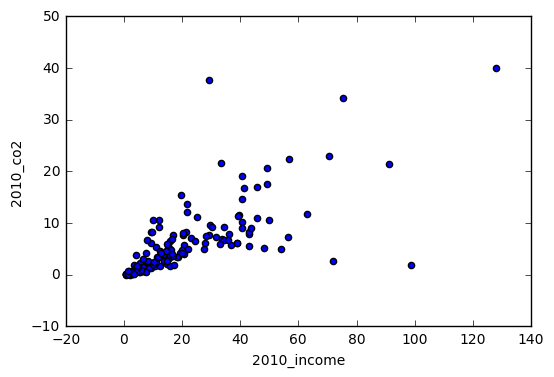

In [6]:
#Cruza as duas tabelas via país
df = co2.set_index('CO2 per capita').join(income.set_index('GDP per capita'), how='inner', lsuffix='_co2', rsuffix='_income')
#Seleciona o ano de 2010 e remove os NaNs
df = df[['2010_co2','2010_income']].dropna()
#Transforma a renda na escala de milhares de dólares
df['2010_income'] /= 1000

#Plota o gráfico de dispersão
df.plot.scatter('2010_income','2010_co2');

___
### Regressão

Vamos tentar agora ajustar um modelo sobre os dados. A primeira tentativa será ajustar um reta:

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$


Esse modelo é muito parecido com o visto na aula 06, com algumas mudanças:
1. Agora utilizaremos $\beta_i$ para se referir aos coeficientes.
1. Existe um termo $\epsilon_i$ para representar os resíduos.

O primeiro passo agora é calcular os valores da regressão. Existem diversas formas de estimar os $\beta$s, vamos utilizar o método de **Mínimos Quadrados Ordinários (MQO ou OLS - Ordinary Least Squares em inglês)**. 

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

$$\hat{\beta}_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

**Obs: Acompanhar e anotar o desenvolvimento no quadro.**
___
**Tarefa 1**: Calcule os valores de $\bar{x}$ e $\bar{y}$. Calcule também $S_{XX}$ e $S_{XY}$, em seguida calcule o $\hat{\beta}_1$ e o $\hat{\beta}_0$

In [7]:
#B0 e B1

yb = df['2010_co2'].mean()
xb = df['2010_income'].mean()

Sxy = ((df['2010_income']-xb)*(df['2010_co2']-yb)).sum()
Sxx = ((df['2010_income']-xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))


beta0: 0.6557309117836834
beta1: 0.24326849086184096


___
Agora calcular o vetor de resíduos, dado por:
$$\epsilon_i=y_i-(\hat{\beta}_0+\hat{\beta}_1x_i)$$

**Tarefa 2**: Plote o histograma dos resíduos. Parece uma Normal?

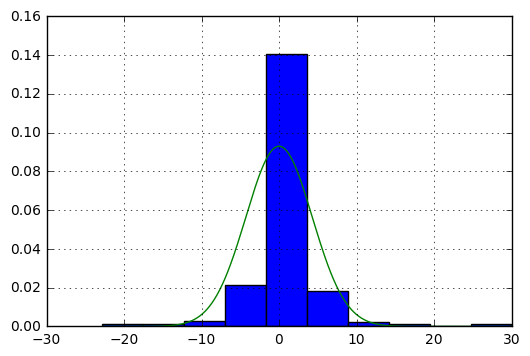

In [8]:
#Hist dos residuos

e = df['2010_co2'] - (b0 + b1*df['2010_income'])
pd.Series(e).hist(normed=True);

(loc, scale) = stats.norm.fit(e)
x = np.arange(e.min(), e.max(), 0.01)
plt.plot(x, stats.norm.pdf(x, loc=loc, scale=scale));


___
Agora que já aprendemos Teste de Hipóteses, podemos verificar se os Betas são realmente relevantes. para tal vamos testar:

$$H_0: \beta_i=0$$
$$H_1: \beta_i\neq0$$

Onde os betas terão a distribuição:

$$\beta_0\sim N(0,\sigma_{\beta_0}^2)\sim N\left(0,\sigma^2\left(\frac{1}{n}+\frac{\bar{x}^2}{S_{XX}}\right)\right)$$
$$\beta_1\sim N(0,\sigma_{\beta_1}^2)\sim N\left(0,\frac{\sigma^2}{S_{XX}}\right)$$

Como não conhecemos o $\sigma^2$, vamos utilizar um valor estimado $\hat{\sigma}^2$:

$$\hat{\sigma}^2=\frac{SS_E}{n-2}=\frac{\sum_{i=1}^n(y_i-(\hat{\beta}_0+\hat{\beta}_1x_i))^2}{n-2}$$

$SS_E$ também é conhecido como Sum of Square Errors (ou SQE em português).
___
**Tarefa 3**: Calcular o erro padrão $\hat{\sigma}$. Cacular também os erros $\hat{\sigma}_{\beta_0}$ e $\hat{\sigma}_{\beta_1}$.


In [9]:
#Teste de Betas
n = len(df['2010_income'])
SSE = ((df['2010_co2']-(b0+b1*df['2010_income']))**2).sum()
sighat2 = SSE/(n-2)

seb1 = (sighat2/Sxx)**0.5
seb0 = (sighat2*(1/n+xb**2/Sxx))**0.5

print("erro padrão: {0}".format(sighat2**0.5))
print("erro padrão beta0: {0}".format(seb0))
print("erro padrão beta1: {0}".format(seb1))

erro padrão: 4.311657546157287
erro padrão beta0: 0.4228263963565281
erro padrão beta1: 0.01586165389610641


**Tarefa 4**: Calcule o **valor-p** para os betas e verifique se rejeitamos ou não $H_0$. Utilize $\alpha=5\%$.

In [10]:
print("Valor-p beta0: {0}".format((1-stats.t.cdf(b0, df=n-2, loc=0, scale=seb0))*2))
#Não rejeita!
print("Valor-p beta1: {0}".format((1-stats.t.cdf(b1, df=n-2, loc=0, scale=seb1))*2))
#Rejeita!!!

Valor-p beta0: 0.12266125708891429
Valor-p beta1: 0.0


**Tarefa 5:** Calcule o **intervalo de confiança** para os betas.

In [11]:
#IC
print(stats.t.ppf(0.025, df=n-2, loc=b0, scale=seb0))
print(stats.t.ppf(0.975, df=n-2, loc=b0, scale=seb0))
print(stats.t.ppf(0.025, df=n-2, loc=b1, scale=seb1))
print(stats.t.ppf(0.975, df=n-2, loc=b1, scale=seb1))

-0.178480427979
1.48994225155
0.211974390821
0.274562590903


___
### Coeficiente de Determinação

$$R^2=1-\frac{SS_E}{SS_T}$$

Onde:

$$SS_T=SS_R+SS_E$$
$$SS_R=\sum_{i=1}^n(\hat{y}-\bar{y})^2$$

$SS_T$: Total Sum of Square

$SS_R$: Regression Sum of Square
___
**Tarefa 6:** Calcule o $R^2$. Interprete.

In [12]:
#R^2
SST = SSE + ((df['2010_co2'].mean()-(b0+b1*df['2010_income']))**2).sum()

R2 = 1 - SSE/SST
print("R2: {0}".format(R2))

R2: 0.5610899476021081


In [13]:
#Teste dos betas simultâneos (se há regressão) - APENAS PARA CONFERÊNCIA - Não foi pedido.
dfn = 1
dfd = n -2

f = (b1**2*Sxx/dfn)/(SSE/dfd)
print("f: {0}".format(f))
print("PropF: {0}".format(1-stats.f.cdf(f, dfn=dfn, dfd=dfd)))


f: 235.22029125274094
PropF: 1.1102230246251565e-16


___
### Grand Finale

Agora que estão familiarizados com algumas medidas, rode a função OLS() da biblioteca statsmodel:

In [15]:
import numpy as np
import statsmodels.api as sm

Y = df['2010_co2']
X = df['2010_income']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               2010_co2   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     235.2
Date:                Mon, 30 Oct 2017   Prob (F-statistic):           9.80e-35
Time:                        23:12:11   Log-Likelihood:                -534.72
No. Observations:                 186   AIC:                             1073.
Df Residuals:                     184   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6557      0.423      1.551      0.123      -0.178       1.490
2010_income     0.2433      0.016     15.337      0.000       0.212       0.275
==============================================================================
Omnibus:                      100.299   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2384.399
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                      20.304   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___
### Para ir além...

Referência: http://www.statsmodels.org/dev/diagnostic.html

**Tarefa 7**: Você consegue interpretar alguns dos resultados acima? Você acha que os resíduos formam uma normal? Fale um pouco sobre a homocedasticidade do modelo.

In [23]:
#R2 bate
#F/ProbF bate - H0: beta0=beta1=0 simultaneamente.
#B0, ep_B0 bate. Valor-p e IC bate
#B1, ep_B1 bate. Valor-p e IC bate
#Omnibus/ProbOminibus: teste de normalidade via assimetria e curtose (D'Agostino's K-squared test). Esperado 2.020, muito ruim.
#Jarque-Bera/ProbJarque-Bera: teste de normalidade via assimetria e curtose. Também valor medonho.
#Durbin-Watson: teste para autocorrelação (independência) dos resíduos. entre 0 e 4, 2 é ótimo.
#Cond. No.: Teste de multi-colinearidade. >30 significa multicolinearidade significante.

#E a relação de causalidade?

#Homocedasticidade
#Teste de White:  H0: é homocedástico
from statsmodels.stats import diagnostic
(lm, plm, f, pf) = diagnostic.het_white(results.resid, results.model.exog)
print("Valor de f: {0}, valor-p: {1}".format(f, pf)) #Rejeita H0.

Valor de f: 14.00894609863429, valor-p: 2.1830341481715435e-06
